In [1]:
import pandas as pd
import numpy as np
import gymnasium as gym
from gymnasium.wrappers import FlattenObservation
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
import pygame
from algorithms.rl import RL
from examples.test_env import TestEnv
from algorithms.planner import Planner
import itertools
import os
import matplotlib.pyplot as plt
import math
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# grid search
# from examples.grid_search import GridSearch

In [2]:
class Plots:
    @staticmethod
    def grid_world_policy_plot(data, label):
        if not math.modf(math.sqrt(len(data)))[0] == 0.0:
            warnings.warn("Grid map expected.  Check data length")
        else:
            grid = int(math.sqrt(np.array(data).shape[0]))
            data = np.around(np.array(data).reshape((grid, grid)), 2)
            df = pd.DataFrame(data=data)
            my_colors = ((0.0, 0.0, 0.0, 1.0), (0.8, 0.0, 0.0, 1.0), (0.0, 0.8, 0.0, 1.0), (0.0, 0.0, 0.8, 1.0))
            cmap = LinearSegmentedColormap.from_list('Custom', my_colors, len(my_colors))
            ax = sns.heatmap(df, cmap=cmap, linewidths=1.0)
            colorbar = ax.collections[0].colorbar
            colorbar.set_ticks([.4, 1.1, 1.9, 2.6])
            colorbar.set_ticklabels(['Left', 'Down', 'Right', 'Up'])
            plt.title(label)
            plt.show()

    @staticmethod
    def grid_values_heat_map(data, label, ax=None):
        if not math.modf(math.sqrt(len(data)))[0] == 0.0:
            warnings.warn("Grid map expected.  Check data length")
        else:
            grid = int(math.sqrt(np.array(data).shape[0]))
            data = np.around(np.array(data).reshape((grid, grid)), 2)
            df = pd.DataFrame(data=data)
            sns.heatmap(df, annot=True, ax=ax).set_title(label)
            plt.show()

    @staticmethod
    def v_iters_plot(data, label,ax=None):
        df = pd.DataFrame(data=data)
        df.columns = [label]
        sns.set_theme(style = "whitegrid")
        title = label + " per Iterations"
        sns.lineplot(x=df.index, y=label, data=df, ax=None).set_title(title)
        plt.show()

## Value Iteration

c:\Users\lboad\py_venv\rl\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


runtime = 1.98 seconds


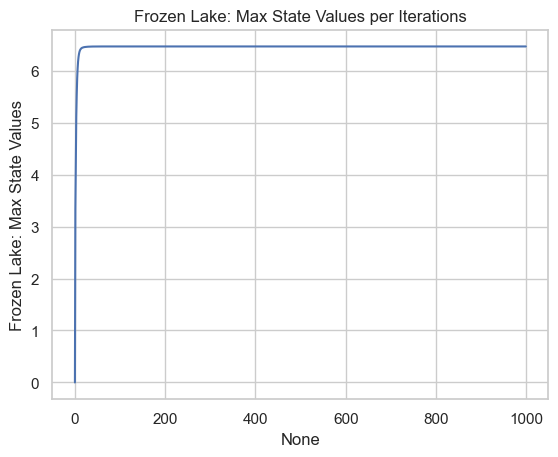

In [50]:
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=32))
# VI/PI v_iters_plot
V, V_track, pi, conv_track = Planner(frozen_lake.env.P).value_iteration(gamma=0.9)
max_value_per_iter = np.amax(V_track, axis=1)
Plots.v_iters_plot(max_value_per_iter, "Frozen Lake: Max State Values")
plt.show()

In [54]:
test_scores = TestEnv.test_env(env=frozen_lake.env, render=False, user_input=False, pi=pi)
print(test_scores.mean())

201.8734375


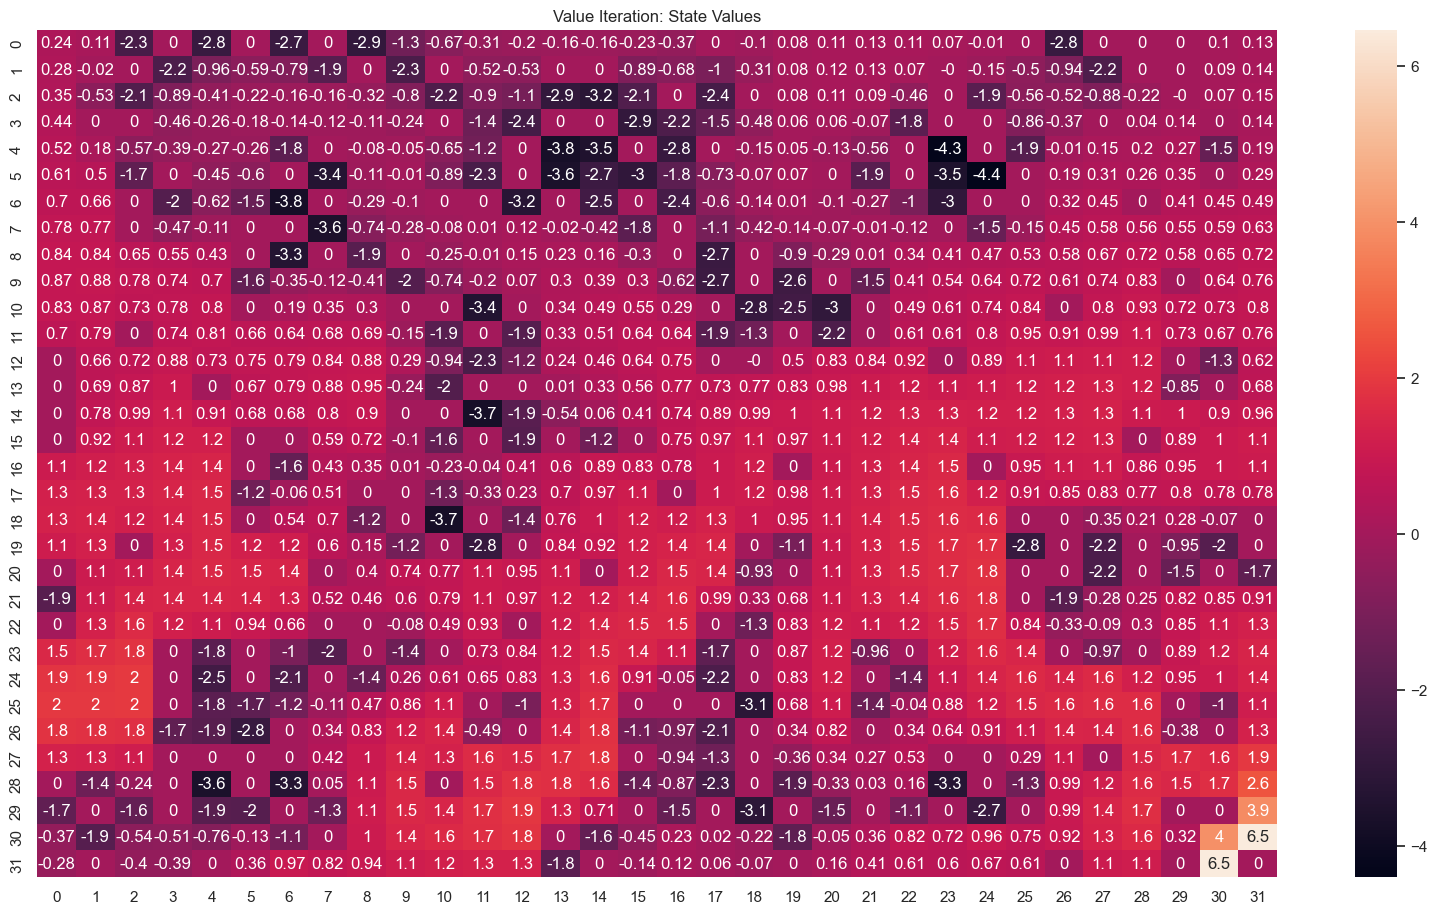

In [55]:
fig, ax = plt.subplots(figsize=(20,11))
Plots.grid_values_heat_map(V, "Value Iteration: State Values", ax=ax)

## Policy Iteration

c:\Users\lboad\py_venv\rl\lib\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(
c:\Users\lboad\py_venv\rl\lib\site-packages\algorithms\planner.py:148: UserWarning: Max iterations reached before convergence.  Check n_iters.
  warnings.warn("Max iterations reached before convergence.  Check n_iters.")


runtime = 160.26 seconds


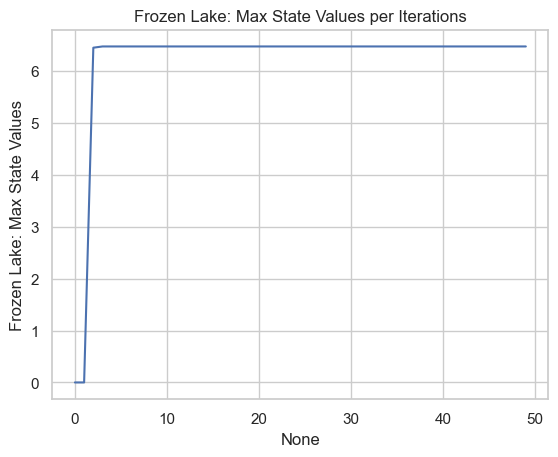

In [8]:
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=32))
# VI/PI v_iters_plot
V, V_track, pi, conv_track = Planner(frozen_lake.env.P).policy_iteration(gamma=0.9)
max_value_per_iter = np.amax(V_track, axis=1)
Plots.v_iters_plot(max_value_per_iter, "Frozen Lake: Max State Values")
plt.show()

In [ ]:
test_scores = TestEnv.test_env(env=frozen_lake.env, render=False, user_input=False, pi=pi)
print(test_scores.mean())

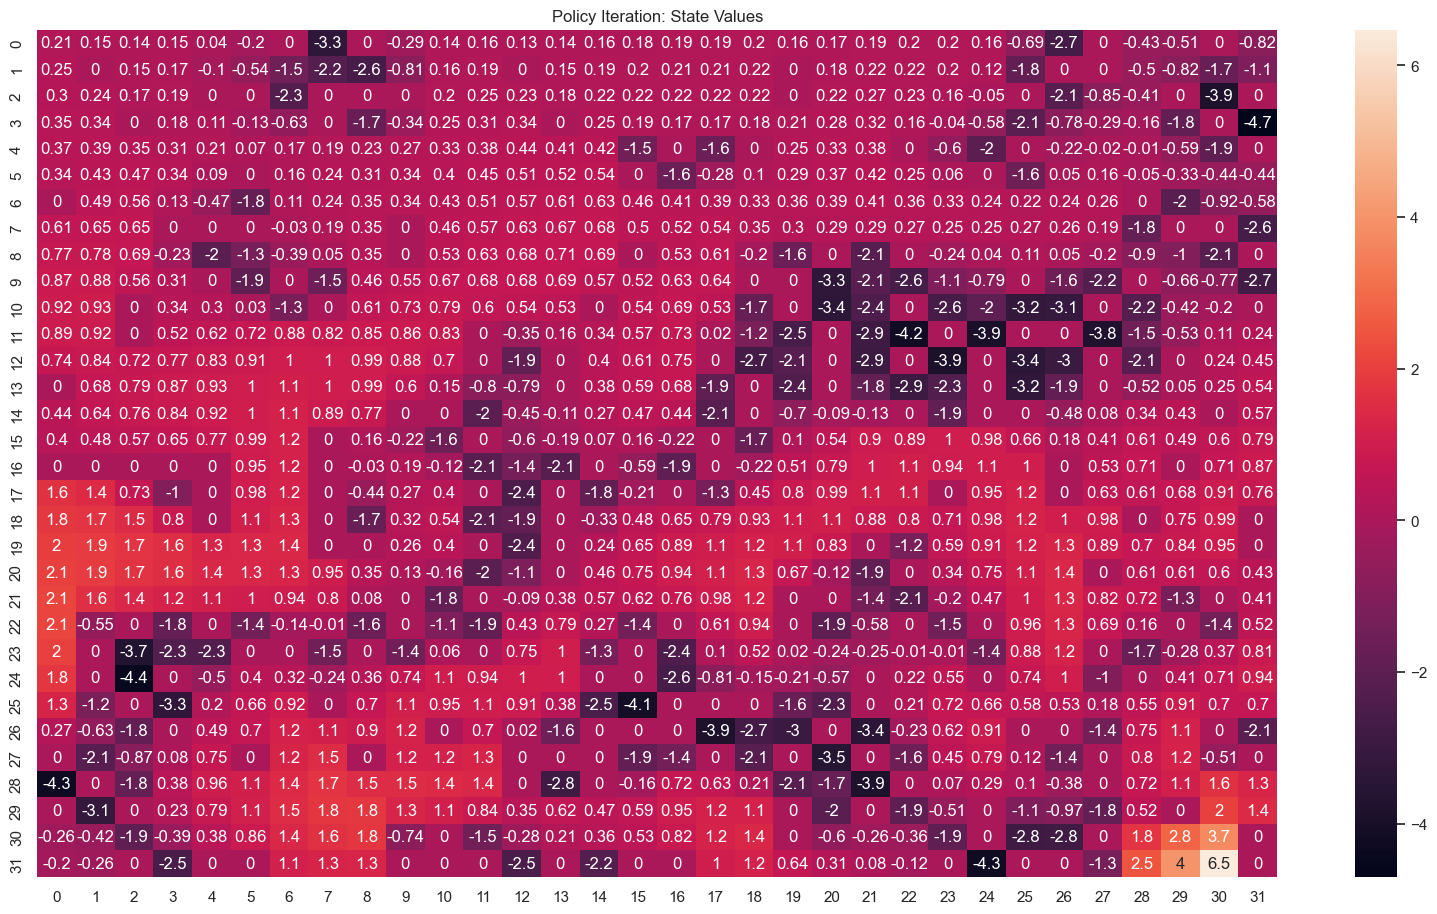

In [9]:
fig, ax = plt.subplots(figsize=(20,11))
Plots.grid_values_heat_map(V, "Policy Iteration: State Values", ax=ax)

## Q-Learning

runtime = 55.41 seconds


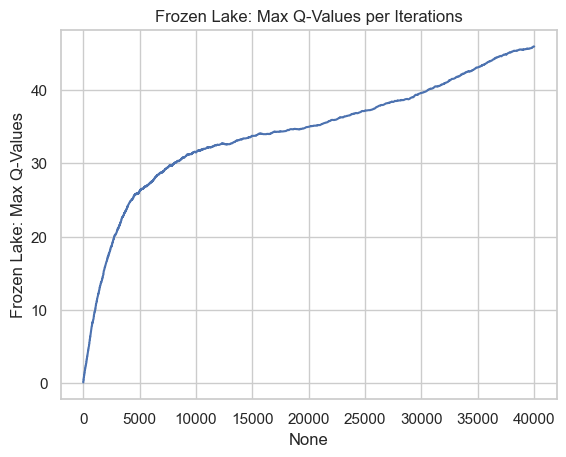

In [56]:
frozen_lake = gym.make('FrozenLake-v1', desc=generate_random_map(size=32))
# Q-learning v_iters_plot
Q, V, pi, Q_track, pi_track = RL(frozen_lake.env).q_learning(gamma=0.9, init_alpha=0.1,min_alpha = 0.05,min_epsilon=0.2,n_episodes=40_000)
max_q_value_per_iter = np.amax(np.amax(Q_track, axis=2), axis=1)
Plots.v_iters_plot(max_q_value_per_iter, "Frozen Lake: Max Q-Values")

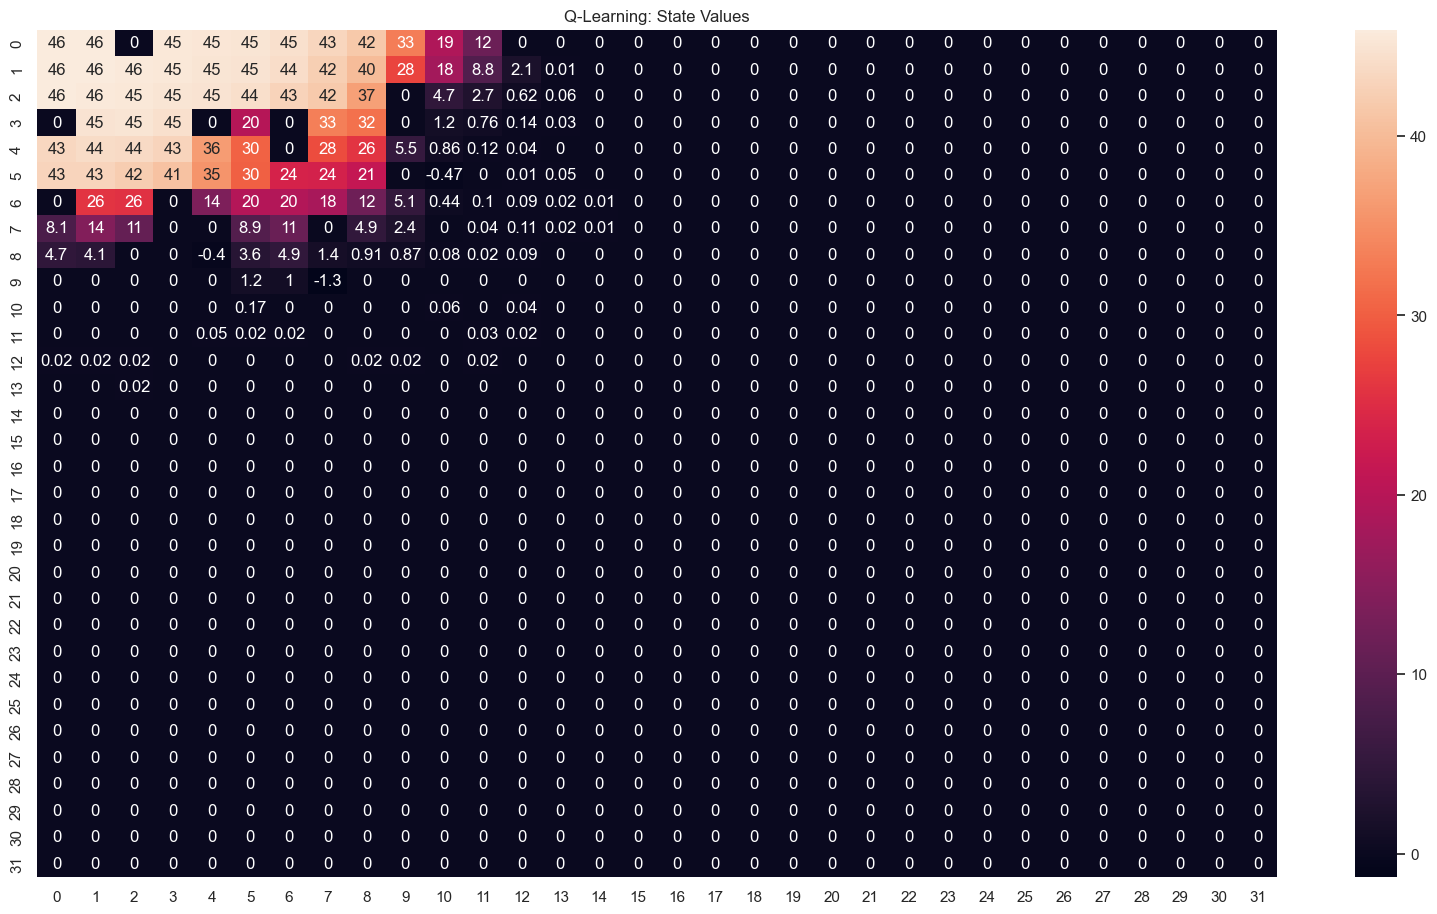

In [57]:
fig, ax = plt.subplots(figsize=(20,11))
Plots.grid_values_heat_map(V, "Q-Learning: State Values", ax=ax)

In [58]:
test_scores = TestEnv.test_env(env=frozen_lake.env, render=False, user_input=False, pi=pi)
print(test_scores.mean())

In [ ]:
pi_track[-1]

In [ ]:
pi_track[0].shape

In [ ]:
Q_track.shape

In [ ]:
plt.plot(Q_track.mean(axis=2).mean(1))

In [ ]:
Q_track.mean(axis=1).mean(1)